# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create List to hold all the data
city_list = []
country_list = []
date_list = []
cloudiness_list = []
humidity_list = []
lat_list = []
lng_list = []
maxtemp_list = []
windspeed_list = []

# Build query Url
base_url = "https://api.openweathermap.org/data/2.5/weather?"
appid = api_key,
units = "imperial"
query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="
query_num = 0

# Begin pulling data using queries
print("Beginning Data Retrieval")
print("---------------------------------------")
for city in cities:
    query_num += 1
#     print(f"Processing record {query_num} for the city: {city}")   
    response = requests.get(query_url + city)
    response_json = response.json()
    querycity_id = response_json.get("id")
    cityname = response_json.get("name")
    
#     print(response_json)
    if response_json.get("id"):
        print(f" Processing Record {query_num} of Set 1 | {cityname}")
        city_list.append(cityname)
        country_list.append(response_json["sys"]["country"])
        date_list.append(response_json["dt"])
        cloudiness_list.append(response_json["clouds"]["all"])
        humidity_list.append(response_json["main"]["humidity"])
        lat_list.append(response_json["coord"]["lat"])
        lng_list.append(response_json["coord"]["lon"])
        maxtemp_list.append(response_json["main"]["temp_max"])
        windspeed_list.append(response_json["wind"]["speed"])           
    else:
        print("City not found. Skipping...")
          
print("---------------------------------------")
print("Processing Complete")

Beginning Data Retrieval
---------------------------------------
 Processing Record 1 of Set 1 | Tulum
 Processing Record 2 of Set 1 | Cape Town
 Processing Record 3 of Set 1 | Airai
 Processing Record 4 of Set 1 | Medowie
 Processing Record 5 of Set 1 | Portland
 Processing Record 6 of Set 1 | Sao Filipe
City not found. Skipping...
City not found. Skipping...
 Processing Record 9 of Set 1 | Busselton
 Processing Record 10 of Set 1 | Saint-Philippe
 Processing Record 11 of Set 1 | Zharkent
 Processing Record 12 of Set 1 | Nizhniy Kuranakh
 Processing Record 13 of Set 1 | Mataura
 Processing Record 14 of Set 1 | Saldanha
 Processing Record 15 of Set 1 | Punta Arenas
 Processing Record 16 of Set 1 | Hobart
 Processing Record 17 of Set 1 | San Patricio
City not found. Skipping...
 Processing Record 19 of Set 1 | Yellowknife
 Processing Record 20 of Set 1 | Arraial do Cabo
 Processing Record 21 of Set 1 | Clyde River
 Processing Record 22 of Set 1 | Helong
 Processing Record 23 of Set 1 | 

 Processing Record 197 of Set 1 | Ust-Nera
 Processing Record 198 of Set 1 | Los Llanos de Aridane
 Processing Record 199 of Set 1 | Westport
 Processing Record 200 of Set 1 | Binidayan
 Processing Record 201 of Set 1 | Vorsma
 Processing Record 202 of Set 1 | Coihaique
 Processing Record 203 of Set 1 | Shar
 Processing Record 204 of Set 1 | San Cristobal
 Processing Record 205 of Set 1 | Abay
 Processing Record 206 of Set 1 | Chakrata
 Processing Record 207 of Set 1 | Boende
 Processing Record 208 of Set 1 | Bani Walid
 Processing Record 209 of Set 1 | Mount Gambier
 Processing Record 210 of Set 1 | Chara
 Processing Record 211 of Set 1 | Dubrovnik
 Processing Record 212 of Set 1 | Okhotsk
 Processing Record 213 of Set 1 | Coromandel
 Processing Record 214 of Set 1 | Ternate
 Processing Record 215 of Set 1 | Bubaque
 Processing Record 216 of Set 1 | Dongsheng
 Processing Record 217 of Set 1 | Port Elizabeth
 Processing Record 218 of Set 1 | Somerset East
 Processing Record 219 of Set 

 Processing Record 392 of Set 1 | Samana
City not found. Skipping...
 Processing Record 394 of Set 1 | Gumdag
 Processing Record 395 of Set 1 | Hakodate
 Processing Record 396 of Set 1 | Detmold
 Processing Record 397 of Set 1 | Belle Glade
 Processing Record 398 of Set 1 | Sumter
 Processing Record 399 of Set 1 | Alta Floresta
 Processing Record 400 of Set 1 | Burnie
 Processing Record 401 of Set 1 | The Valley
 Processing Record 402 of Set 1 | Astaneh-ye Ashrafiyeh
 Processing Record 403 of Set 1 | Saint-Francois
 Processing Record 404 of Set 1 | Qandala
 Processing Record 405 of Set 1 | Grand-Santi
 Processing Record 406 of Set 1 | Petropavlovsk-Kamchatskiy
 Processing Record 407 of Set 1 | Cartagena
 Processing Record 408 of Set 1 | Nongstoin
 Processing Record 409 of Set 1 | Gizo
 Processing Record 410 of Set 1 | Ferme-Neuve
 Processing Record 411 of Set 1 | Buraydah
 Processing Record 412 of Set 1 | Hambantota
 Processing Record 413 of Set 1 | Naisud
 Processing Record 414 of Set

 Processing Record 589 of Set 1 | Gorontalo
 Processing Record 590 of Set 1 | Ondangwa
 Processing Record 591 of Set 1 | Urengoy
 Processing Record 592 of Set 1 | Satna
 Processing Record 593 of Set 1 | Visby
 Processing Record 594 of Set 1 | Smidovich
 Processing Record 595 of Set 1 | Gushikawa
 Processing Record 596 of Set 1 | Yulara
 Processing Record 597 of Set 1 | Namatanai
 Processing Record 598 of Set 1 | Quatre Cocos
 Processing Record 599 of Set 1 | Payson
 Processing Record 600 of Set 1 | Chinsali
 Processing Record 601 of Set 1 | Yakovlevka
 Processing Record 602 of Set 1 | Carutapera
City not found. Skipping...
 Processing Record 604 of Set 1 | La Vega
 Processing Record 605 of Set 1 | Pangnirtung
 Processing Record 606 of Set 1 | Sao Felix do Xingu
 Processing Record 607 of Set 1 | Roald
 Processing Record 608 of Set 1 | Bridgton
City not found. Skipping...
 Processing Record 610 of Set 1 | Kristiansund
 Processing Record 611 of Set 1 | Arrifes
 Processing Record 612 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create the data Frame from the lists
weather_df = pd.DataFrame({"City" : city_list,
                           "Country" : country_list,
                            "Date" : date_list,
                            "Cloudiness" : cloudiness_list,
                            "Humidity": humidity_list,
                            "Lat": lat_list,
                            "Lng" : lng_list,
                            "Max Temp" : maxtemp_list,
                            "Wind Speed" : windspeed_list})

weather_df.head()

,City,Country,Date,Cloudiness,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tulum,MX,1554040818,20,88,20.21,-87.46,78.01,4.74
1,Cape Town,ZA,1554040690,20,43,-33.93,18.42,71.60,10.29
2,Airai,TL,1554040885,0,86,-8.93,125.41,67.05,1.61
3,Medowie,AU,1554040580,90,67,-32.73,151.85,62.01,6.93
4,Portland,US,1554040385,1,81,45.52,-122.67,45.00,2.17


In [5]:
# export to CSV 
weather_df.to_csv(output_data_file,index = False, header = True)
weather_df.count()

City          569
Country       569
Date          569
Cloudiness    569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

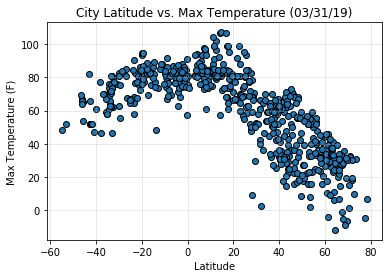

In [6]:
# Create Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black")
plt.grid(alpha = 0.35)
plt.title("City Latitude vs. Max Temperature (" + time.strftime('%m/%d/%y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("CityLat_MaxTemp.png")

#### Latitude vs. Humidity Plot

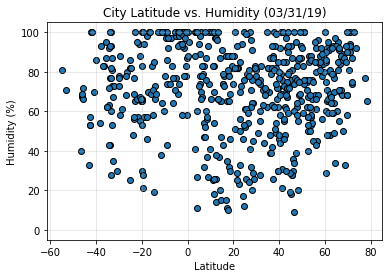

In [7]:
# Create Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black")
plt.grid(alpha = 0.35)
plt.title("City Latitude vs. Humidity (" + time.strftime('%m/%d/%y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-5,105)
plt.savefig("CityLat_Humidity.png")

#### Latitude vs. Cloudiness Plot

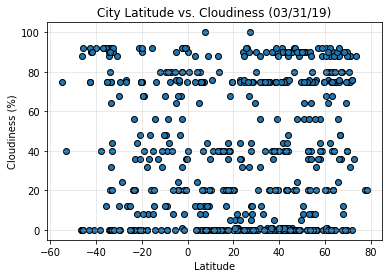

In [8]:
# Create Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black")
plt.grid(alpha = 0.35)
plt.title("City Latitude vs. Cloudiness (" + time.strftime('%m/%d/%y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("CityLat_Cloudiness.png")

#### Latitude vs. Wind Speed Plot

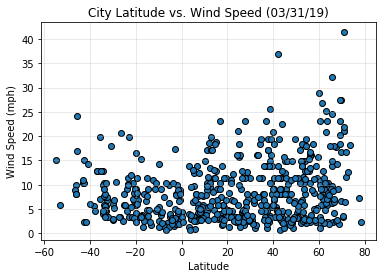

In [9]:
# Create Scatter plot
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black")
plt.grid(alpha = 0.35)
plt.title("City Latitude vs. Wind Speed (" + time.strftime('%m/%d/%y') + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("CityLat_WindSpeed.png")